In [6]:
import sys
sys.path.append('.')
import math
from phyphox import PhyPhoxData
import pandas as pd
import io
import matplotlib.pyplot as plt

In [95]:
data = PhyPhoxData('phyphox/FreeFall-15m.zip')
df_pressure = data.ReadDataFrame('Barometer')
df_pressure

,Time (s),X (hPa)
0,0.000000,1001.352005
1,1.019342,1001.351089
2,2.038773,1001.350174
3,3.058147,1001.349716
4,4.077513,1001.348953
5,5.096886,1001.348724
6,5.253780,1001.348724
7,6.197638,1001.370926
8,7.141462,1001.391525
9,8.085200,1001.422119


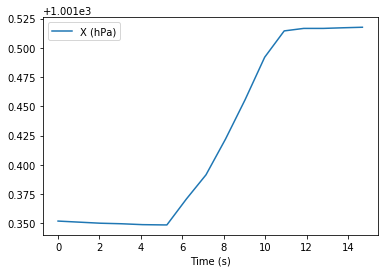

In [96]:
df_pressure.plot('Time (s)','X (hPa)')

In [97]:
min_p,max_p = df_pressure['X (hPa)'].min(),df_pressure['X (hPa)'].max()
print("Pmin={}, Pmax={}".format(min_p,max_p))

Pmin=1001.3487240000001, Pmax=1001.5175630000001


vycheslyaem raznost' po  [barometricheskoi formule](https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D1%80%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%B0)

In [98]:
h=18400*(1+0.003665*22)*math.log(max_p/min_p,10)
print("Высота падения = {} м.".format(h))

Высота падения = 1.4558947029398501 м.


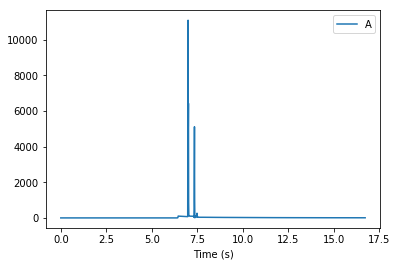

In [99]:
df_acc = data.ReadDataFrame('Linear Accelerometer')
df_acc['A'] = df_acc['X (m/s^2)']**2+df_acc['Y (m/s^2)']**2+df_acc['Z (m/s^2)']**2
df_acc.plot('Time (s)','A')

In [110]:
threshold = df_acc.A.max()/3.
df_ac = df_acc[df_acc.A>threshold]
t0 = df_ac.iloc[0]['Time (s)']
t1 = df_ac[df_ac['Time (s)']>t0+0.2].iloc[0]['Time (s)']
print("Start time={}, End time={}, Delta={}".format(t0,t1,t1-t0))
df_ac

Start time=6.984934625, End time=7.345682625, Delta=0.36074800000000007


,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2),A
697,6.984935,-64.527505,6.014441,69.489593,9028.775866
698,6.994945,-73.326970,30.189256,69.379646,11101.771094
699,7.004954,16.561516,-9.373689,69.091767,5135.822067
700,7.014995,40.214960,-2.230434,69.361941,6433.296677
733,7.345683,4.145195,-6.271826,71.141394,5117.616315


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


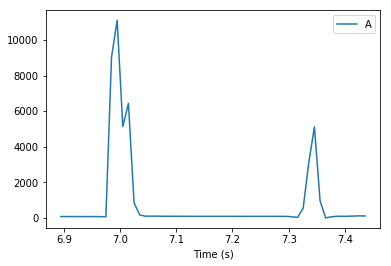

In [111]:
df_a = df_acc[df_acc['Time (s)']>t0-0.1][df_acc['Time (s)']<t1+0.1]
df_a.plot('Time (s)','A')

Расстояние, которое прошел телефон за время $\Delta t=t_1-t_0$ будет равно
$$h=\frac{g\Delta t^2}{2}$$. Отсюда
$$g=\frac{2h}{\Delta t^2}$$

In [112]:
g = 2*h/((t1-t0)**2)
g

22.374436041809865